### EDA
Nick's EDA notebook

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, accuracy_score, plot_confusion_matrix, RocCurveDisplay
from sklearn.compose import ColumnTransformer
from joblib import dump, load

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
X_df = pd.read_csv('../data/4910797b-ee55-40a7-8668-10efd5c1b960.csv')
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [3]:
X_df.scheme_name.value_counts()

K                                                 682
None                                              644
Borehole                                          546
Chalinze wate                                     405
M                                                 400
DANIDA                                            379
Government                                        320
Ngana water supplied scheme                       270
wanging'ombe water supply s                       261
wanging'ombe supply scheme                        234
I                                                 229
Bagamoyo wate                                     229
Uroki-Bomang'ombe water sup                       209
N                                                 204
Kirua kahe gravity water supply trust             193
Machumba estate pipe line                         185
Makwale water supplied sche                       166
Kijiji                                            161
S                           

In [4]:
X_df.num_private.value_counts()

0       58643
6          81
1          73
5          46
8          46
32         40
45         36
15         35
39         30
93         28
3          27
7          26
2          23
65         22
47         21
102        20
4          20
17         17
80         15
20         14
25         12
11         11
41         10
34         10
16          8
120         7
150         6
22          6
12          5
24          5
50          5
38          4
58          4
9           4
10          4
14          3
61          3
27          2
26          2
160         1
30          1
698         1
60          1
1402        1
450         1
668         1
131         1
35          1
672         1
42          1
136         1
87          1
300         1
280         1
141         1
62          1
111         1
240         1
1776        1
755         1
180         1
213         1
23          1
55          1
94          1
Name: num_private, dtype: int64

In [5]:
X_df.construction_year.value_counts() # <- around 40% of construction years are unknown

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [6]:
X_df.funder.isna().sum()

3635

In [7]:
X_df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [8]:
X_df.scheme_name.value_counts # drop this column as >50% of data is missing

<bound method IndexOpsMixin.value_counts of 0                                                 Roman
1                                                   NaN
2                           Nyumba ya mungu pipe scheme
3                                                   NaN
4                                                   NaN
5                                             Zingibali
6                                                   NaN
7                                                   NaN
8                                                   NaN
9                                                   NaN
10                                                  NaN
11                                                  NaN
12                                                  NaN
13                                           BL Bondeni
14                                                 None
15                                                  NaN
16                          wanging'ombe water supply s
17  

In [9]:
X_df.extraction_type.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [10]:
X_df.extraction_type_group.value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [11]:
X_df.extraction_type_class.value_counts() # most descriptive of 3 extraction-type sets of data

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [12]:
X_df.payment.value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [13]:
X_df.payment_type.value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [14]:
X_df.water_quality.value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [15]:
X_df.quality_group.value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [16]:
X_df.water_quality.isna().sum(), X_df.quality_group.isna().sum()

(0, 0)

In [17]:
X_df.quantity_group.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [18]:
X_df.quantity.value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [19]:
X_df.source.value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [20]:
X_df.source_type.value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [21]:
X_df.source_class.value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [22]:
X_df.waterpoint_type.value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [23]:
X_df.waterpoint_type_group.value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [24]:
X_df.management.value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [25]:
X_df.management_group.value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [26]:
X_df.lga.value_counts()

Njombe              2503
Arusha Rural        1252
Moshi Rural         1251
Bariadi             1177
Rungwe              1106
Kilosa              1094
Kasulu              1047
Mbozi               1034
Meru                1009
Bagamoyo             997
Singida Rural        995
Kilombero            959
Same                 877
Kibondo              874
Kyela                859
Kahama               836
Magu                 824
Kigoma Rural         824
Maswa                809
Karagwe              771
Mbinga               750
Iringa Rural         728
Serengeti            716
Namtumbo             694
Lushoto              694
Songea Rural         693
Mpanda               679
Mvomero              671
Ngara                669
Ulanga               665
Makete               630
Kwimba               627
Mbarali              626
Hai                  625
Rombo                594
Shinyanga Rural      588
Nzega                575
Ludewa               564
Mkuranga             560
Iramba               544


In [27]:
X_df.ward.value_counts()

Igosi                      307
Imalinyi                   252
Siha Kati                  232
Mdandu                     231
Nduruma                    217
Kitunda                    203
Mishamo                    203
Msindo                     201
Chalinze                   196
Maji ya Chai               190
Usuka                      187
Ngarenanyuki               172
Chanika                    171
Vikindu                    162
Mtwango                    153
Matola                     145
Zinga/Ikerege              141
Wanging'ombe               139
Maramba                    139
Itete                      137
Magomeni                   135
Kikatiti                   134
Ifakara                    134
Olkokola                   133
Maposeni                   130
Mvomero                    129
Igongolo                   129
Mlangali                   125
Nkoma                      122
Nkungulu                   121
Mahongole                  121
Rujewa                     120
Simbo   

In [28]:
X_df.region.value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [29]:
X_df.district_code.value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [30]:
X_df.date_recorded.value_counts()

2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
2011-03-18    497
2011-03-19    466
2013-02-04    464
2013-01-29    459
2011-03-04    458
2013-02-14    444
2013-01-24    435
2011-03-05    434
2013-02-15    429
2013-03-15    428
2011-03-11    426
2013-01-30    421
2013-02-16    418
2011-03-23    417
2011-03-09    416
2013-01-18    409
2011-03-30    391
2013-02-26    391
2013-03-19    381
2011-03-24    381
2013-02-13    380
2013-01-23    379
2011-03-12    379
2011-03-03    378
2013-01-28    376
2011-03-13    373
2011-07-27    373
2013-02-19    371
2013-02-02    370
2013-02-18    369
2013-01-19    368
2013-01-22    364
2011-03-10    364
2011-03-22    364
2013-02-08    363
2013-03-18    360
2012-10-22    353
2011-02-26    351
2011-03-21    351
2013-03-04    347
2013-03-13    346
2011-07-30    345
2011-03-26    342
2013-01-16    342
2011-02-28    341
2013-02-27    340
2013-02-01    338
2011-07-19    338
2013-01-25    338
2011-04-17    337
2013-01-27

In [31]:
X_df.construction_year.value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [32]:
# will ACTUALLY drop in comb_df below
drop_cols = ['id', 'num_private', 'construction_year', 'scheme_name', \
  'extraction_type', 'extraction_type_group', 'payment_type', 'water_quality', \
  'quantity_group', 'source', 'waterpoint_type_group']
X_df.drop(columns=drop_cols).columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'permit',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'quality_group', 'quantity', 'source_type', 'source_class',
       'waterpoint_type'],
      dtype='object')

In [33]:
pd.to_datetime(X_df.date_recorded, yearfirst=True).dtypes

dtype('<M8[ns]')

#### Drop relevant columns, feat. engineering

In [34]:
y_df = pd.read_csv('../data/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')
y_df['needs_repair'] = 1 * (y_df.status_group == 'functional')
y_df.needs_repair

0        1
1        1
2        1
3        0
4        1
5        1
6        0
7        0
8        0
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       0
17       0
18       0
19       1
20       1
21       1
22       0
23       1
24       1
25       0
26       1
27       1
28       0
29       1
30       1
31       1
32       0
33       1
34       1
35       0
36       0
37       1
38       1
39       0
40       1
41       1
42       1
43       0
44       0
45       0
46       0
47       1
48       1
49       1
50       1
51       0
52       1
53       0
54       1
55       0
56       1
57       0
58       1
59       0
60       1
61       0
62       0
63       0
64       1
65       0
66       1
67       0
68       0
69       0
70       0
71       0
72       0
73       0
74       1
75       0
76       1
77       1
78       0
79       1
80       1
81       0
82       1
83       1
84       0
85       0
86       1
87       0
88       0
89       0
90       0

In [35]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
 2   needs_repair  59400 non-null  int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 1.1+ MB


In [36]:
#X_df.date_recorded.iloc[0]

In [37]:
#[type(i) for i in X_df.dtypes]

In [38]:
# converts two boolean columns to int

#X_df['public_meeting'] = X_df['public_meeting'].astype(np.int32)
X_df['public_meeting'] = X_df['public_meeting'].replace({True: 1, False: 0})
X_df['permit'] = X_df['permit'].replace({True: 1, False: 0})

type(X_df.public_meeting.iloc[0]), type(X_df.permit.iloc[0])

(numpy.float64, numpy.float64)

In [39]:
#X_df.date_recorded = pd.to_datetime(X_df.date_recorded, yearfirst=True)


comb_df = y_df.merge(X_df).drop(columns=drop_cols)
comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   status_group           59400 non-null  object 
 1   needs_repair           59400 non-null  int32  
 2   amount_tsh             59400 non-null  float64
 3   date_recorded          59400 non-null  object 
 4   funder                 55765 non-null  object 
 5   gps_height             59400 non-null  int64  
 6   installer              55745 non-null  object 
 7   longitude              59400 non-null  float64
 8   latitude               59400 non-null  float64
 9   wpt_name               59400 non-null  object 
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [40]:
comb_df.dtypes.value_counts()

object     21
float64     5
int64       4
int32       1
dtype: int64

## X & y

In [41]:
comb_df.head()

status_group  needs_repair  amount_tsh date_recorded        funder  \
0      functional             1      6000.0    2011-03-14         Roman   
1      functional             1         0.0    2013-03-06       Grumeti   
2      functional             1        25.0    2013-02-25  Lottery Club   
3  non functional             0         0.0    2013-01-28        Unicef   
4      functional             1         0.0    2011-07-13   Action In A   

   gps_height     installer  longitude   latitude              wpt_name  \
0        1390         Roman  34.938093  -9.856322                  none   
1        1399       GRUMETI  34.698766  -2.147466              Zahanati   
2         686  World vision  37.460664  -3.821329           Kwa Mahundi   
3         263        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu   
4           0       Artisan  31.130847  -1.825359               Shuleni   

                     basin  subvillage   region  region_code  district_code  \
0               Lake Nyasa    Mnyusi B   Iringa           11              5   
1            Lake Victoria     Nyamara     Mara           20              2   
2                  Pangani     Majengo  Manyara           21              4   
3  Ruvuma / Southern Coast  Mahakamani   Mtwara           90             63   
4            Lake Victoria  Kyanyamisa   Kagera           18              1   

         lga        ward  population  public_meeting              recorded_by  \
0     Ludewa    Mundindi         109             1.0  GeoData Consultants Ltd   
1  Serengeti       Natta         280             NaN  GeoData Consultants Ltd   
2  Simanjiro     Ngorika         250             1.0  GeoData Consultants Ltd   
3   Nanyumbu    Nanyumbu          58             1.0  GeoData Consultants Ltd   
4    Karagwe  Nyakasimbi           0             1.0  GeoData Consultants Ltd   

  scheme_management  permit extraction_type_class management management_group  \
0               VWC     0.0               gravity        vwc       user-group   
1             Other     1.0               gravity        wug       user-group   
2               VWC     1.0               gravity        vwc       user-group   
3               VWC     1.0           submersible        vwc       user-group   
4               NaN     1.0               gravity      other            other   

          payment quality_group      quantity           source_type  \
0    pay annually          good        enough                spring   
1       never pay          good  insufficient  rainwater harvesting   
2  pay per bucket          good        enough                   dam   
3       never pay          good           dry              borehole   
4       never pay          good      seasonal  rainwater harvesting   

  source_class              waterpoint_type  
0  groundwater           communal standpipe  
1      surface           communal standpipe  
2      surface  communal standpipe multiple  
3  groundwater  communal standpipe multiple  
4      surface           communal standpipe

In [42]:
X = comb_df.drop(columns=['status_group', 'needs_repair'])
X.head()

amount_tsh date_recorded        funder  gps_height     installer  \
0      6000.0    2011-03-14         Roman        1390         Roman   
1         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2        25.0    2013-02-25  Lottery Club         686  World vision   
3         0.0    2013-01-28        Unicef         263        UNICEF   
4         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name                    basin  \
0  34.938093  -9.856322                  none               Lake Nyasa   
1  34.698766  -2.147466              Zahanati            Lake Victoria   
2  37.460664  -3.821329           Kwa Mahundi                  Pangani   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu  Ruvuma / Southern Coast   
4  31.130847  -1.825359               Shuleni            Lake Victoria   

   subvillage   region  region_code  district_code        lga        ward  \
0    Mnyusi B   Iringa           11              5     Ludewa    Mundindi   
1     Nyamara     Mara           20              2  Serengeti       Natta   
2     Majengo  Manyara           21              4  Simanjiro     Ngorika   
3  Mahakamani   Mtwara           90             63   Nanyumbu    Nanyumbu   
4  Kyanyamisa   Kagera           18              1    Karagwe  Nyakasimbi   

   population  public_meeting              recorded_by scheme_management  \
0         109             1.0  GeoData Consultants Ltd               VWC   
1         280             NaN  GeoData Consultants Ltd             Other   
2         250             1.0  GeoData Consultants Ltd               VWC   
3          58             1.0  GeoData Consultants Ltd               VWC   
4           0             1.0  GeoData Consultants Ltd               NaN   

   permit extraction_type_class management management_group         payment  \
0     0.0               gravity        vwc       user-group    pay annually   
1     1.0               gravity        wug       user-group       never pay   
2     1.0               gravity        vwc       user-group  pay per bucket   
3     1.0           submersible        vwc       user-group       never pay   
4     1.0               gravity      other            other       never pay   

  quality_group      quantity           source_type source_class  \
0          good        enough                spring  groundwater   
1          good  insufficient  rainwater harvesting      surface   
2          good        enough                   dam      surface   
3          good           dry              borehole  groundwater   
4          good      seasonal  rainwater harvesting      surface   

               waterpoint_type  
0           communal standpipe  
1           communal standpipe  
2  communal standpipe multiple  
3  communal standpipe multiple  
4           communal standpipe

In [43]:
y = comb_df.needs_repair
y

0        1
1        1
2        1
3        0
4        1
5        1
6        0
7        0
8        0
9        1
10       1
11       1
12       1
13       1
14       1
15       1
16       0
17       0
18       0
19       1
20       1
21       1
22       0
23       1
24       1
25       0
26       1
27       1
28       0
29       1
30       1
31       1
32       0
33       1
34       1
35       0
36       0
37       1
38       1
39       0
40       1
41       1
42       1
43       0
44       0
45       0
46       0
47       1
48       1
49       1
50       1
51       0
52       1
53       0
54       1
55       0
56       1
57       0
58       1
59       0
60       1
61       0
62       0
63       0
64       1
65       0
66       1
67       0
68       0
69       0
70       0
71       0
72       0
73       0
74       1
75       0
76       1
77       1
78       0
79       1
80       1
81       0
82       1
83       1
84       0
85       0
86       1
87       0
88       0
89       0
90       0

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.5, random_state=1)

In [45]:
X_train_num = X_train.select_dtypes(['float64','int64', 'int32', 'int'])
X_train_cat = X_train.select_dtypes('object')

X_train_num.dtypes.tolist(), X_train_cat.dtypes.tolist()

([dtype('float64'),
  dtype('int64'),
  dtype('float64'),
  dtype('float64'),
  dtype('int64'),
  dtype('int64'),
  dtype('int64'),
  dtype('float64'),
  dtype('float64')],
 [dtype('O'),
  dtype('O'),
  dtype('O'),
  dtype('O'),
  dtype('O'),
  dtype('O'),
  dtype('O'),
  dtype('O'),
  dtype('O'),
  dtype('O'),
  dtype('O'),
  dtype('O'),
  dtype('O'),
  dtype('O'),
  dtype('O'),
  dtype('O'),
  dtype('O'),
  dtype('O'),
  dtype('O'),
  dtype('O')])

In [46]:
#X_train_cat.dtypes

[i for i in X_train_cat]

['date_recorded',
 'funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'recorded_by',
 'scheme_management',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'quality_group',
 'quantity',
 'source_type',
 'source_class',
 'waterpoint_type']

In [47]:
#X_train_cat['date_recorded']

[type(X_train_cat[i].iloc[0]) for i in X_train_cat] # <- helped identify 2 booleans which were giving issues

[str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str,
 str]

In [48]:
[i for i in X_train_cat if type(X_train_cat[i].iloc[0]) is bool] #<-- 'public_meeting' and 'permit' are booleans, need to be converted to int

[]

In [49]:
pipeline_num = Pipeline([('impute_num', SimpleImputer(strategy='mean')), \
  ('scaler_num', StandardScaler())])

In [50]:
pipeline_cat = Pipeline([('impute_cat', SimpleImputer(strategy='constant', fill_value='None')), \
  ('ohe_cat', OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [51]:
preprocess_transform = ColumnTransformer([('numeric', pipeline_num, X_train_num.columns.tolist()), \
  ('categorical', pipeline_cat, X_train_cat.columns.tolist())])

In [52]:
pipeline_LR = Pipeline([('preprocess_LR', preprocess_transform), \
  ('model_LR', LogisticRegression(random_state=1))])

In [53]:
pipeline_KNN = Pipeline([('preprocess_KNN', preprocess_transform), \
  ('model_KNN', KNeighborsClassifier())])

In [54]:
pipeline_DT = Pipeline([('preprocess_DT', preprocess_transform), \
  ('model_DT', DecisionTreeClassifier())])

In [55]:
pipeline_RF = Pipeline([('preprocess_RF', preprocess_transform), \
  ('model_RF', RandomForestClassifier())])

#### LR

In [56]:
def validate_model(search, X_train, X_test, y_train, y_test):
  search.fit(X_train, y_train)
  y_test_pred = search.predict(X_test)
  cv_results = pd.DataFrame([search.cv_results_])
  # accuracy = 'mean_test_accuracy'
  print(f'Train recall score: {search.best_score_}')
  print(f'Test recall score: {recall_score(y_test, y_test_pred)}')
  print(f'Best parameters: {search.best_params_}')
  plot_confusion_matrix(search, X_train, y_train)
  return search.cv_results_, search.best_params_

c:\Users\nicho\.conda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\nicho\.conda\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Train recall score: 0.8472310892115704
Test recall score: 0.8380657160570366
Best parameters: {'model_LR__penalty': 'l2'}


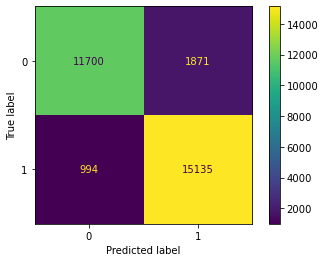

In [57]:

params_LR = {'model_LR__penalty': ['l2', 'none']} # got warnings for l1 & elasticnet

search_LR = GridSearchCV(pipeline_LR, params_LR, cv=10, scoring=['recall', 'accuracy'], refit='recall')

cv_LR, best_params_LR = validate_model(search_LR, X_train, X_test, y_train, y_test)

In [59]:
from joblib import dump, load

dump(search_LR, './models/search_LR.joblib')
dump(cv_LR, './models/cv_LR.joblib')
dump(best_params_LR, './models/best_params_LR.joblib')

['./models/best_params_LR.joblib']

In [60]:
loadtest_search_LR = load('./models/search_LR.joblib')
loadtest_y_test_pred = loadtest_search_LR.predict(X_test)

print(f'Test recall score: {recall_score(y_test, loadtest_y_test_pred)}')

Load test recall score: 0.8380657160570366


In [ ]:
#np.arange(5, 30, 4)
#np.arange(20, 41, 10)
np.arange(1, 3)

array([1, 2])

In [ ]:
params_KNN = {'model_KNN__n_neighbors': np.arange(5, 10, 2), \
  'model_KNN__weights': ['uniform', 'distance'], \
  'model_KNN__leaf_size': np.arange(20, 31, 10)}

#search_KNN = GridSearchCV(pipeline_KNN, params_KNN, cv=10, scoring=['recall', 'accuracy'], refit='recall')

#cv_KNN, best_params_KNN = validate_model(search_KNN, X_train, X_test, y_train, y_test) <- ran for 500+ minutes before I decided to interrupt kernel

In [ ]:
#dump(search_KNN, './models/search_KNN.joblib')
#dump(cv_KNN, './models/cv_KNN.joblib')
#dump(best_params_KNN, './models/best_params_KNN.joblib')